In [1]:
import nltk

# 말뭉치 가져오기

In [2]:
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_raw[:1000]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

# 토큰 생성
- 자연어 문서에서 분석을 위해 긴 문자열을 작은 단위로 나누는 것
- 문장 단위, 단어단위, 정규표현식으로 나눌 수 있음

In [5]:
#문장단위 - 토큰 생성
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:10000])[1])

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.


In [6]:
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [7]:
from nltk.tokenize import RegexpTokenizer
retTokenize = RegexpTokenizer("[\w]+")
retTokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

# 형태소 분석
- 형태소 : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
- 보통 자연어 처리에서 토큰으로 형태소를 이용
- 형태소 분석 : 단어로부터 야근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고
이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 형태소 분석의 예
    - 어간 추출
    - 원형 복원
    - 품사 부착

# 어간
- PorterStemmer, lancasterStremmer 제공
- 어간추출은 단순히 어미만 제거함

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']
print('Porter stemmer: ', [st1.stem(w) for w in words])
print('LancasterStemmer: ', [st2.stem(w) for w in words])

Porter stemmer:  ['fli', 'fli', 'fli', 'flew', 'flown']
LancasterStemmer:  ['fly', 'fli', 'fly', 'flew', 'flown']


In [9]:
list1 = []
for w in words:
    list1.append(st1.stem(w))
print(list1)

list2 = [st1.stem(w) for w in words]
print(list2)

['fli', 'fli', 'fli', 'flew', 'flown']
['fli', 'fli', 'fli', 'flew', 'flown']


# 원형복원
- 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업

In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\it\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
Im = WordNetLemmatizer()
[Im.lemmatize(w, 'v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

# 품사부착
- 품사는 낱말을 문접적인 기능이나 형태, 뜻에 따라 구분한 것
- 품사의 예
    - NNP : 단순고유명사
    - VB : 동사
    - VBP : 동사현재형
    - NN : 명사
    - DT : 관형사

In [12]:
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to obtain the refuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [13]:
noun_list = [t[0] for t in tagged_list if t[1] == 'NN']
noun_list

['refuse', 'permit']

In [14]:
noun_list1 = [t[0] if t[1]=='NN' else 'NOT NN' for t in tagged_list]
noun_list1

['NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'refuse',
 'permit']

In [15]:
list1 = []
for t in tagged_list:
    if t[1] == "NN":
        list1.append(t[0])
    else : 
        list1.append('NOT NN')

list1

['NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'NOT NN',
 'refuse',
 'permit']

In [16]:
from nltk.tag import untag
untag_list = untag(tagged_list)
untag_list

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [17]:


emma_list = pos_tag(word_tokenize(emma_raw[:2000]))
untag_emma = untag(emma_list)
untag_emma

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [18]:
from nltk import Text
text = Text(retTokenize.tokenize(emma_raw))
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


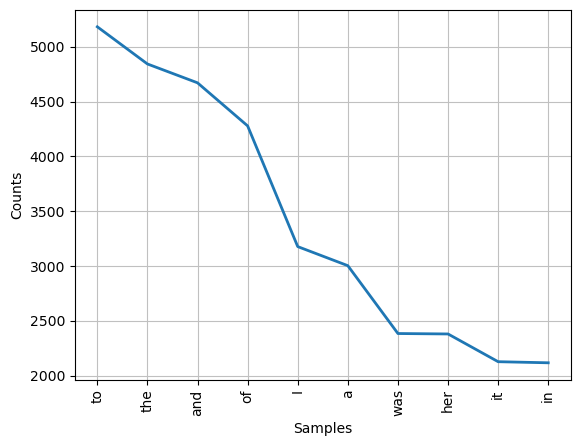

In [19]:
import matplotlib.pyplot as plt
text.plot(10)
plt.show()

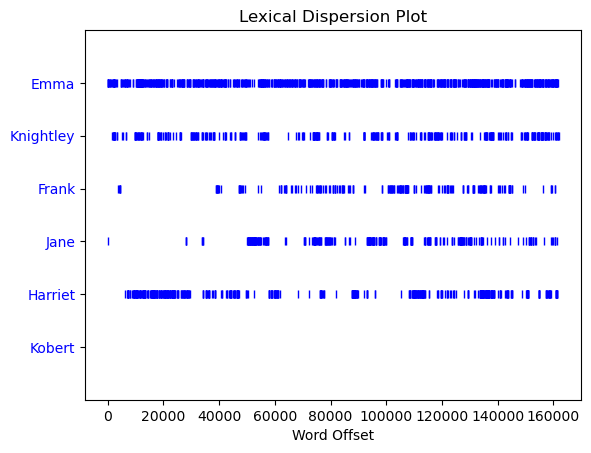

In [20]:
text.dispersion_plot(['Emma', 'Knightley', 'Frank', 'Jane', 'Harriet', 'Kobert'])

In [21]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [22]:
text.similar('Emma')

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [23]:
text.common_contexts('Emma', 'she')

No common contexts were found


In [24]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [25]:
from nltk import FreqDist
stopwords=['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs','Dear']
emma_token = pos_tag(retTokenize.tokenize(emma_raw))
# emma_token
name_list = [t[0] for t in emma_token if t[1] == 'NNP' and t[0] not in stopwords]


In [26]:
fd_name = FreqDist(name_list)
fd_name

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [27]:
print(fd_name.N())
print(fd_name['Emma'])
print(fd_name.freq('Emma'))

7863
830
0.10555767518758744


In [28]:
fd_name.most_common(10)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

In [34]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [35]:
im = Image.open('data/dog.png')
mask_arr = np.array(im)

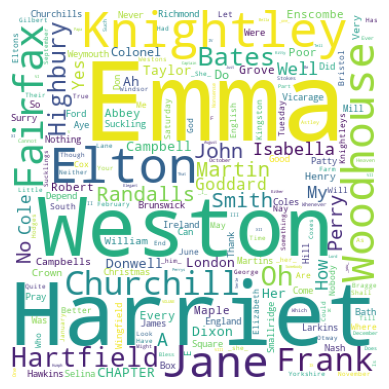

In [36]:
wc = WordCloud(width=1000, height=1000, background_color='white', mask=mask_arr, random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off')
plt.savefig('data/wc.png')
plt.show()

In [38]:
from konlpy.tag import *
Hannanum = Hannanum()
import konlpy
konlpy.__version__


'0.6.0'

In [43]:
from konlpy.corpus import kolaw
kolaw.fileids

<bound method CorpusLoader.fileids of <konlpy.corpus.CorpusLoader object at 0x000001F8AAE0E410>>

In [49]:
c = kolaw.open('constitution.txt').read()
print(c[:50])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [50]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [54]:
d = kobill.open('1809890.txt').read()
print(d[:100])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이


# 형태소 분석 
- konlpy의 형태소 분석, 태깅 라이브러리
    - Hannanum : 한나눔, KAIST Semantic Web Research Center 개발
    - KoNLPy는 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.
- Hannanum: 한나눔. KAIST Semantic Web Research Center 개발. -http://semanticweb.kaist.ac.kr/hannanum/
    - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
    - http://kkma.snu.ac.kr/
    - Komoran: 코모란. Shineware에서 개발.
    - https://github.com/shin285/KOMORAN
    - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.
    - https://github.com/open-korean-text/open-korean-text
    - 여기에서는 한나눔, 꼬꼬마, 오픈코리안텍스트 형태소만 예제로 포함하였다


In [59]:
from konlpy.tag import *
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

- 형태소 분석기 공통적 기능
    - nouns: 명사 추출
    - morphs: 형태소 추출
    - pos: 형태소 분석과 품사태깅

In [60]:
hannanum.nouns(c[:50])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임']

In [61]:
kkma.nouns(c[:50])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동',
 '건립',
 '대한민국임',
 '임']

In [62]:
komoran.nouns(c[:50])

['대한민국', '헌법', '역사', '전통', '국민', '운동', '건립', '대한민국', '임']

In [69]:
s='텍스트 분석은 어려워요 ㅋㅋㅋ'
okt.pos(s)

[('텍스트', 'Noun'),
 ('분석', 'Noun'),
 ('은', 'Josa'),
 ('어려워요', 'Adjective'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [70]:
okt.morphs(s)

['텍스트', '분석', '은', '어려워요', 'ㅋㅋㅋ']